In [1]:
%matplotlib widget

In [2]:
import edrixs 
import numpy as np
import lmfit
import matplotlib.pyplot as plt
import io
import sys
from ana_functions import *
import scipy

%matplotlib widget

In [3]:
plt.rcParams['figure.dpi'] = 100

In [4]:
def get_I(thin, alpha, F):
    intensity = 0
    for beta in [0, np.pi/2]:
        thout = two_theta - thin
        ei, ef = edrixs.dipole_polvec_rixs(thin*np.pi/180, thout*np.pi/180,
                                           phi*np.pi/180, alpha, beta)
        intensity += np.abs(np.dot(ef, np.dot(F, ei)))**2
    return intensity

$d_{xz/yz}$ $\pi$ NSF = 1.375000
$d_{xz/yz}$ $\sigma$ NSF = 2.750000
$d_{xz/yz}$ $\pi$ SF = 0.625000
$d_{xz/yz}$ $\sigma$ SF = 1.250000
$d_{xy}$ $\pi$ NSF = 2.000000
$d_{xy}$ $\sigma$ NSF = 2.000000
$d_{xy}$ $\pi$ SF = 0.250000
$d_{xy}$ $\sigma$ SF = 1.000000
$d_{3z^2-r^2}$ $\pi$ NSF = 0.500000
$d_{3z^2-r^2}$ $\sigma$ NSF = 1.666667
$d_{3z^2-r^2}$ $\pi$ SF = 0.333333
$d_{3z^2-r^2}$ $\sigma$ SF = 0.500000
$d_{x^2-y^2}$ $\pi$ NSF = 1.000000
$d_{x^2-y^2}$ $\sigma$ NSF = 4.000000
$d_{x^2-y^2}$ $\pi$ SF = 0.500000
$d_{x^2-y^2}$ $\sigma$ SF = 0.500000


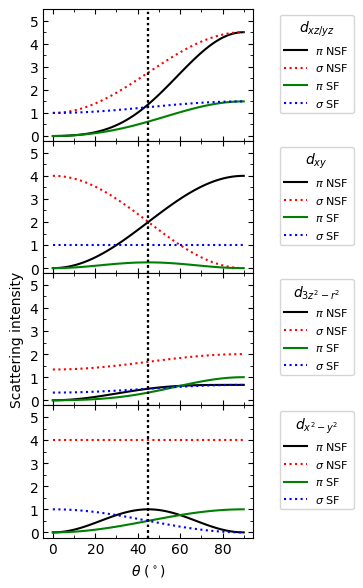

In [5]:
fig, axs = plt.subplots(4, 1, figsize=(7, 7),
                        sharex=True, sharey=True)

thins = np.linspace(0, 90)
two_theta = 90
phi = 0

groundstate_vector = get_eigenvector(3, 0)

# labels and indices in order of what's plotted
# indexing is d3z2-r2 dzx dzy dx2-y2 dxy
orbital_labels = ['$d_{xz/yz}$', '$d_{xy}$',
                  '$d_{3z^2-r^2}$', '$d_{x^2-y^2}$', ]
orbital_order = [[1, 2], [4], [0], [3]]
                    
from cycler import cycle
colors = cycle(['k', 'r', 'g', 'b'])
linestyles = cycle(['-', ':', '-', ':'])

total_intensities = {}
    
plot_index = 0
for ax, orbital_set, orbital_label in zip(axs, orbital_order, orbital_labels):
    Itot = 0
    for spin_index, spin_label in zip([0, 1], ['NSF', 'SF']):
        for alpha, pol_label in zip([0, np.pi/2], [r'$\pi$', r'$\sigma$']):
            Is = np.zeros_like(thins)
            I45 = 0
            for orbital_index in orbital_set:
                excitedstate_vector = get_eigenvector(orbital_index, spin_index)
                F = get_F(groundstate_vector, excitedstate_vector)
                Is += np.array([get_I(thin, alpha, F) for thin in thins])
                I45 += get_I(45, alpha, F)*9*4
                if pol_label == r'$\sigma$':
                    Itot += get_I(45, alpha, F)*9*4

            ax.plot(thins, Is*9*4, label=f'{pol_label} {spin_label}',
                    color=next(colors), linestyle=next(linestyles))
            ax.axvline(x=45, color='k', linestyle=':')
            plot_index += 1
            print(f"{orbital_label} {pol_label} {spin_label} = {I45:.6f}")
            if orbital_label != '$d_{x^2-y^2}$':
                total_intensities.update({orbital_label: Itot})
                
    ax.legend(title=orbital_label, bbox_to_anchor=(1.1, 1),
              loc="upper left", fontsize=8)
    ax.yaxis.set_ticks(np.arange(0, 6, 1))
    ax.set_ylim(top=5.5)
    formatax(ax)


axs[-1].set_xlabel(r'$\theta$ ($^\circ$)')
axs[2].set_ylabel('Scattering intensity')

fig.subplots_adjust(hspace=0, left=.3, right=.6)
plt.show()

In [6]:
total_intensities

{'$d_{3z^2-r^2}$': 2.166666666666666, '$d_{xy}$': 3.0, '$d_{xz/yz}$': 4.0}

In [7]:
intensities_norm = {key:val/max(total_intensities.values())
                    for key, val in total_intensities.items()}
intensities_norm

{'$d_{3z^2-r^2}$': 0.5416666666666665, '$d_{xy}$': 0.75, '$d_{xz/yz}$': 1.0}

This is not the same as moretti

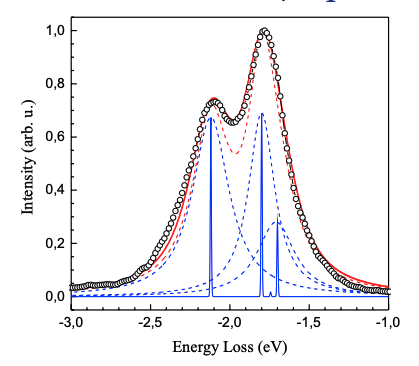

In [8]:
from IPython.display import Image
Image(filename='moretti.png') 